<a href="https://colab.research.google.com/github/SebastianBedoya03/Lenguaje_Programaci-n/blob/main/Examen_Institucional_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy-financial

In [2]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [3]:
# Cargar archivo CSV con el delimitador correcto (punto y coma)
flujos_csv = pd.read_csv("/content/Flujos_de_caja (1).csv", encoding="cp1252", delimiter=";")
flujos_csv.head()


,Proyecto,Inversion_Inicial,Año1,Año2,Año3,Año4,Año5,Año6,Año7,Año8,Año9,Año10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [4]:
# Revisión de Registros Nulos
flujos_csv.isnull().sum()

,0
Proyecto,0
Inversion_Inicial,0
Año1,0
Año2,0
Año3,0
Año4,0
Año5,0
Año6,0
Año7,0
Año8,0


In [5]:
flujos_csv.set_index("Proyecto", inplace=True)

In [6]:
# Tasa de Descuento
tasa_descuento = 0.15
# Calcular VPN
def calcular_vpn(df, tasa_descuento):
    vpn = []
    for proyecto in df.index:
        flujos = df.loc[proyecto].values.astype(float)
        valor_vpn = npf.npv(tasa_descuento, flujos)
        vpn.append(round(valor_vpn, 2))
    df['VPN'] = vpn
    return df

In [7]:
flujos_csv = calcular_vpn(flujos_csv, tasa_descuento)
print("El valor Presente Neto (VPN) por proyecto es el siguiente:")
print(flujos_csv[['VPN']])

El valor Presente Neto (VPN) por proyecto es el siguiente:
                                                            VPN
Proyecto                                                       
Winston Smith                                      -19009578.75
Julia                                              -12978862.93
O'Brien                                              2753396.10
Big Brother                                         29057737.47
Don Quijote                                         44234271.75
...                                                         ...
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  53570911.32
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  10323693.14
Odiseo el Sabio el Rojo el Sabio II I               11922900.75
Moriarty la Eterna el Rojo II                       -9925448.30
Amaranta III la Eterna el Rojo de Itaca             34948717.03

[1000 rows x 1 columns]


In [8]:
# Especificar columnas
columnas_flujo = ['Inversion_Inicial', 'Año1', 'Año2', 'Año3', 'Año4',
                  'Año5', 'Año6', 'Año7', 'Año8', 'Año9', 'Año10']

# calcular TIR
def calcular_tir(df, columnas_flujo):
    tir = []
    for proyecto in df.index:
        flujos = df.loc[proyecto, columnas_flujo].astype(float).values
        try:
            valor_tir = round(npf.irr(flujos), 4)
        except:
            valor_tir = np.nan
        tir.append(valor_tir)
    df["TIR"] = tir
    return df

In [9]:
flujos_csv = calcular_tir(flujos_csv, columnas_flujo)
print("La TIR por proyecto es la siguiente")
print(flujos_csv[['TIR']])

La TIR por proyecto es la siguiente
                                                       TIR
Proyecto                                                  
Winston Smith                                       0.0964
Julia                                               0.1100
O'Brien                                             0.1596
Big Brother                                         0.2926
Don Quijote                                         0.4190
...                                                    ...
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.6369
Alyosha KaramÃ¡zov el Sabio del Desierto III II...  0.1874
Odiseo el Sabio el Rojo el Sabio II I               0.2091
Moriarty la Eterna el Rojo II                       0.1162
Amaranta III la Eterna el Rojo de Itaca             0.3200

[1000 rows x 1 columns]


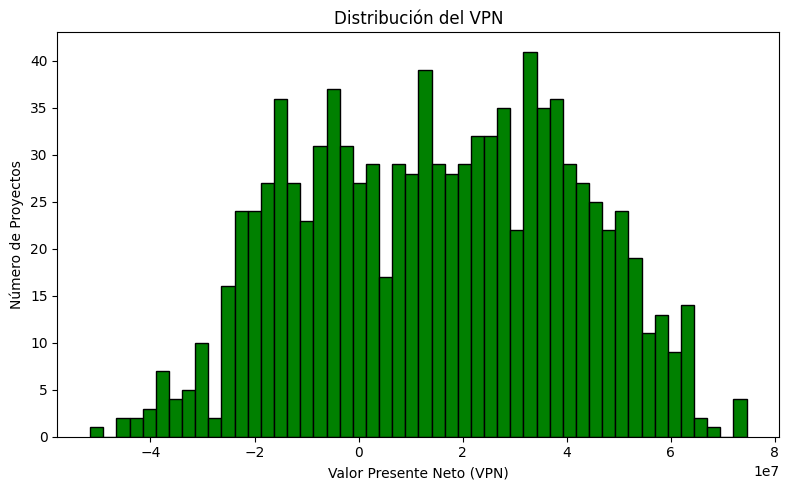

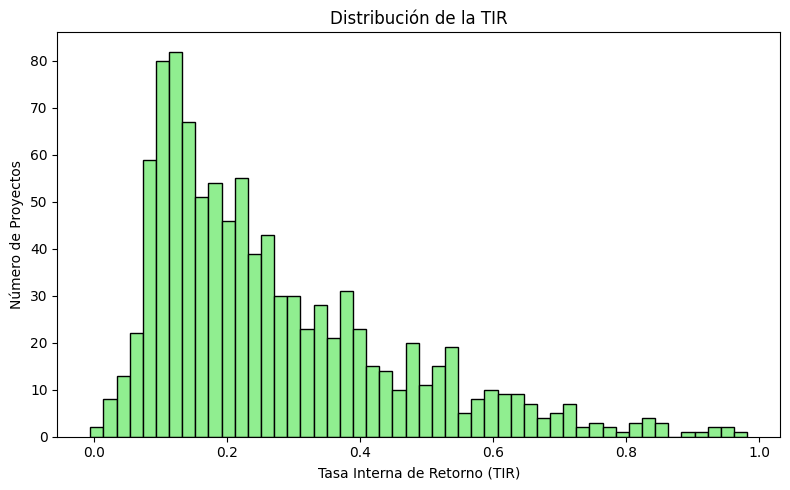

In [10]:
# Histograma de VPN
plt.figure(figsize=(8, 5))
plt.hist(flujos_csv['VPN'], bins=50, color='green', edgecolor='black')
plt.title('Distribución del VPN')
plt.xlabel('Valor Presente Neto (VPN)')
plt.ylabel('Número de Proyectos')
plt.tight_layout()
plt.show()

# Histograma de TIR
plt.figure(figsize=(8, 5))
plt.hist(flujos_csv['TIR'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de la TIR')
plt.xlabel('Tasa Interna de Retorno (TIR)')
plt.ylabel('Número de Proyectos')
plt.tight_layout()
plt.show()

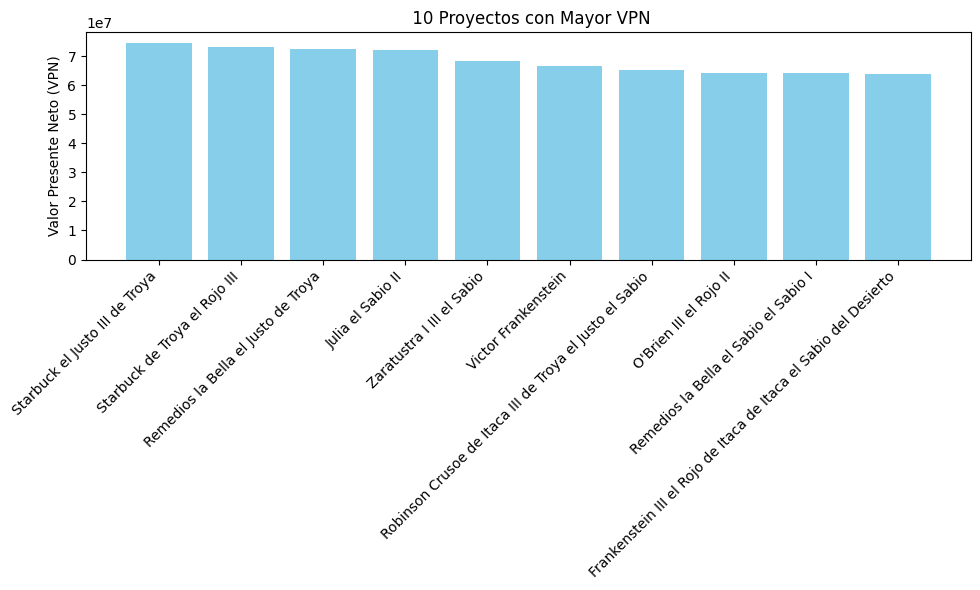

In [11]:
# Grafica de barras proyectos con mayor VPN
mayor_vpn = flujos_csv.sort_values("VPN", ascending=False).head(10) # # con esto podemos mirar el N° de proyectos que queremos observar en la grafica
plt.figure(figsize=(10, 6))
plt.bar(mayor_vpn.index, mayor_vpn["VPN"], color='Skyblue')
plt.xticks(rotation=45, ha='right')
plt.title(" 10 Proyectos con Mayor VPN")
plt.ylabel("Valor Presente Neto (VPN)")
plt.tight_layout()
plt.show()

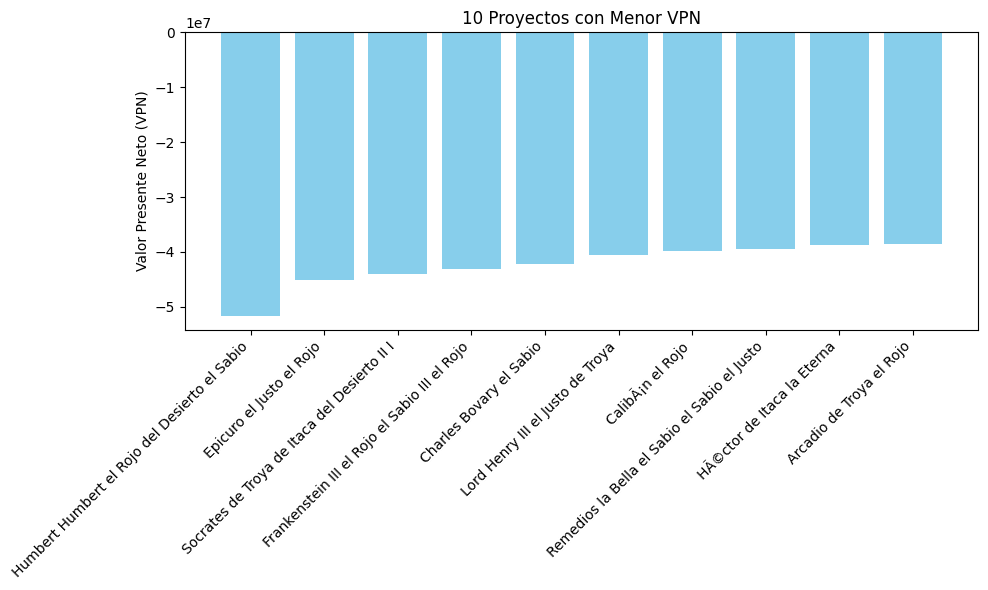

In [12]:
# Grafica de barras proyectos con menor VPN
menor_vpn = flujos_csv.sort_values("VPN", ascending=True).head(10) # con esto podemos mirar el N° de proyectos que queremos observar en la grafica
plt.figure(figsize=(10, 6))
plt.bar(menor_vpn.index, menor_vpn["VPN"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("10 Proyectos con Menor VPN")
plt.ylabel("Valor Presente Neto (VPN)")
plt.tight_layout()
plt.show()

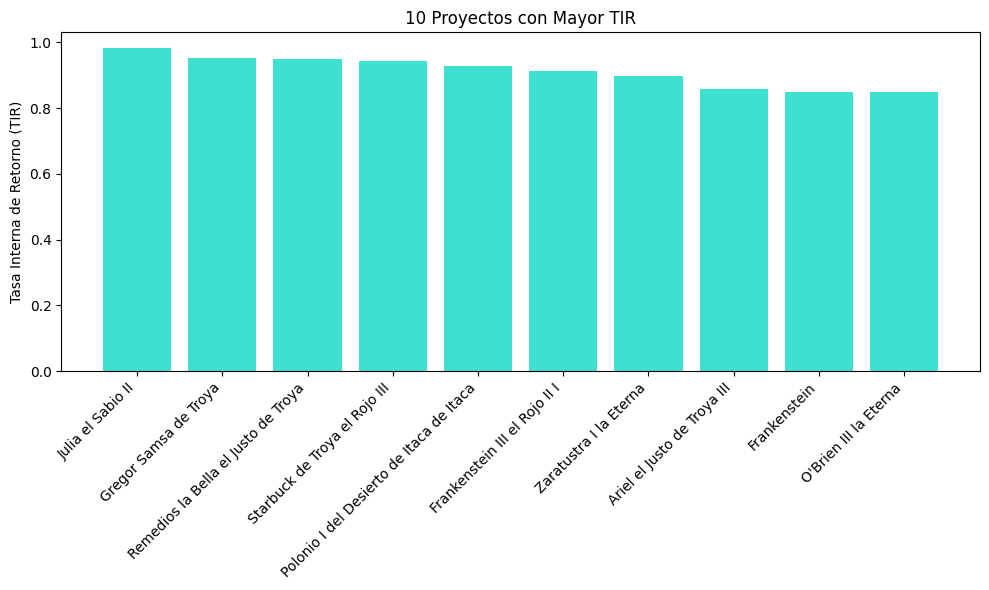

In [13]:
# Grafica de barras proyectos con mayor TIR
mayor_tir = flujos_csv.sort_values("TIR", ascending=False).head(10) # con esto podemos mirar el N° de proyectos que queremos observar en la grafica
plt.figure(figsize=(10, 6))
plt.bar(mayor_tir.index, mayor_tir["TIR"], color='Turquoise')
plt.xticks(rotation=45, ha='right')
plt.title("10 Proyectos con Mayor TIR")
plt.ylabel("Tasa Interna de Retorno (TIR)")
plt.tight_layout()
plt.show()

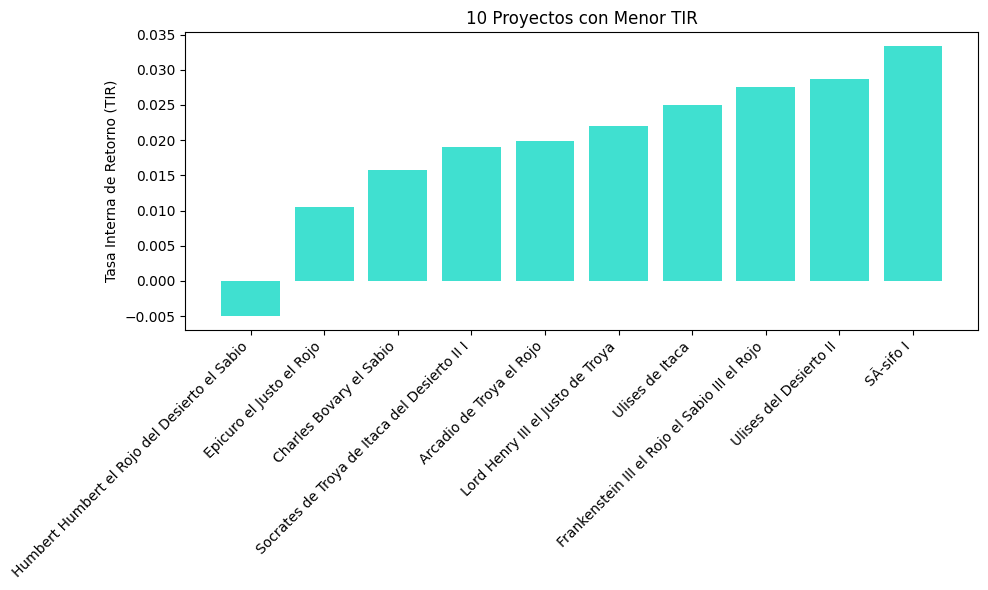

In [14]:
# Grafica de barras proyectos con menor TIR
menor_tir = flujos_csv.sort_values("TIR", ascending=True).head(10)  # con esto podemos mirar el N° de proyectos que queremos observar en la grafica
plt.figure(figsize=(10, 6))
plt.bar(menor_tir.index, menor_tir["TIR"], color='Turquoise')
plt.xticks(rotation=45, ha='right')
plt.title("10 Proyectos con Menor TIR")
plt.ylabel("Tasa Interna de Retorno (TIR)")
plt.tight_layout()
plt.show()

In [37]:
# Función para cargar el archivo CSV
def cargar_datos(archivo_csv):
    try:
        flujos_csv = pd.read_csv(archivo_csv, encoding="cp1252", delimiter=";")
        if 'Proyecto' not in flujos_csv.columns:
            print("Error: La columna 'Proyecto' no se encuentra en el archivo CSV.")
            return None
        flujos_csv.set_index("Proyecto", inplace=True)
        print("Datos cargados exitosamente.")
        print(flujos_csv.head())
        print("\nRegistros nulos por columna:")
        print(flujos_csv.isnull().sum())
        return flujos_csv
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en la ruta: {archivo_csv}")
        return None
    except pd.ParserError as e:
        print(f"Error al leer el archivo CSV: {e}")
        return None
    except Exception as e:
        print(f"Error inesperado al cargar los datos: {e}")
        return None

In [38]:
# Funciones para mostrar gráficas
def mostrar_histograma_vpn(df):
    """
    Genera un histograma de los valores de VPN.

    Args:
        df (pd.DataFrame): DataFrame con los valores de VPN.
    """
    if 'VPN' not in df.columns:
        print("Error: La columna 'VPN' no se encuentra en el DataFrame.")
        return
    plt.figure(figsize=(8, 5))
    plt.hist(df['VPN'], bins=50, color='green', edgecolor='black')
    plt.title('Distribución del VPN')
    plt.xlabel('Valor Presente Neto (VPN)')
    plt.ylabel('Número de Proyectos')
    plt.tight_layout()
    plt.show()

def mostrar_histograma_tir(df):
    """
    Genera un histograma de los valores de TIR.

    Args:
        df (pd.DataFrame): DataFrame con los valores de TIR.
    """
    if 'TIR' not in df.columns:
        print("Error: La columna 'TIR' no se encuentra en el DataFrame.")
        return
    plt.figure(figsize=(8, 5))
    plt.hist(df['TIR'].dropna(), bins=50, color='lightgreen', edgecolor='black')
    plt.title('Distribución de la TIR')
    plt.xlabel('Tasa Interna de Retorno (TIR)')
    plt.ylabel('Número de Proyectos')
    plt.tight_layout()
    plt.show()

def mostrar_barras_vpn(df, top=True):
    """
    Genera un gráfico de barras de los proyectos con los VPN más altos o más bajos.

    Args:
        df (pd.DataFrame): DataFrame con los valores de VPN.
        top (bool, optional): Indica si se muestran los 10 mayores (True) o los 10 menores (False). Por defecto, True.
    """
    if 'VPN' not in df.columns:
        print("Error: La columna 'VPN' no se encuentra en el DataFrame.")
        return
    if top:
        mayor_vpn = df.sort_values("VPN", ascending=False).head(10)
        titulo = "10 Proyectos con Mayor VPN"
    else:
        menor_vpn = df.sort_values("VPN", ascending=True).head(10)
        titulo = "10 Proyectos con Menor VPN"
    plt.figure(figsize=(10, 6))
    plt.bar(mayor_vpn.index if top else menor_vpn.index, mayor_vpn["VPN"] if top else menor_vpn["VPN"], color='Skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(titulo)
    plt.ylabel("Valor Presente Neto (VPN)")
    plt.tight_layout()
    plt.show()

def mostrar_barras_tir(df, top=True):
    """
    Genera un gráfico de barras de los proyectos con las TIR más altas o más bajas.

    Args:
        df (pd.DataFrame): DataFrame con los valores de TIR.
        top (bool, optional): Indica si se muestran los 10 mayores (True) o los 10 menores (False). Por defecto, True.
    """
    if 'TIR' not in df.columns:
        print("Error: La columna 'TIR' no se encuentra en el DataFrame.")
        return
    if top:
        mayor_tir = df.sort_values("TIR", ascending=False).head(10)
        titulo = "10 Proyectos con Mayor TIR"
    else:
        menor_tir = df.sort_values("TIR", ascending=True).head(10)
        titulo = "10 Proyectos con Menor TIR"
    plt.figure(figsize=(10, 6))
    plt.bar(mayor_tir.index if top else menor_tir.index, mayor_tir["TIR"] if top else menor_tir["TIR"], color='Turquoise')
    plt.xticks(rotation=45, ha='right')
    plt.title(titulo)
    plt.ylabel("Tasa Interna de Retorno (TIR)")
    plt.tight_layout()
    plt.show()

In [39]:
# Menú Interactivo con Botones
def display_menu(df, archivo_csv, tasa_descuento, columnas_flujo):
    clear_output()
    print("Menú Interactivo:")

    # Crear botones
    button_visualizardatos = widgets.Button(description="Visualizar Datos")
    button_calcularvpn = widgets.Button(description="Calcular VPN")
    button_calculartir = widgets.Button(description="Calcular TIR")
    button_graficar = widgets.Button(description="Graficar Resultados")
    button_salir = widgets.Button(description="Salir")

    # Variables para almacenar resultados de VPN y TIR
    vpn_results = None
    tir_results = None

    # Funciones de los botones
    def on_button_visualizardatos_clicked(b):
        clear_output()
        print("Datos cargados:")
        print(df)

    def on_button_calcularvpn_clicked(b):
        nonlocal vpn_results
        clear_output()
        df_vpn = calcular_vpn(df.copy(), tasa_descuento)
        vpn_results = df_vpn
        if df_vpn is not None:
            print("El valor Presente Neto (VPN) por proyecto es el siguiente:")
            print(df_vpn[['VPN']])

    def on_button_calculartir_clicked(b):
        nonlocal tir_results
        clear_output()
        df_tir = calcular_tir(df.copy(), columnas_flujo)
        tir_results = df_tir
        if df_tir is not None:
            print("La Tasa Interna de Retorno (TIR) por proyecto es la siguiente:")
            print(df_tir[['TIR']])

    def on_button_graficar_clicked(b):
        clear_output()
        # Primero calcular VPN y TIR si no se han calculado
        if vpn_results is None or tir_results is None:
            # Si no se ha calculado ninguno, calcular ambos
            if vpn_results is None:
                on_button_calcularvpn_clicked(b)
            if tir_results is None:
                on_button_calculartir_clicked(b)
        # Luego verificar si los resultados están disponibles y graficar
        if vpn_results is not None and 'VPN' in vpn_results.columns and tir_results is not None and 'TIR' in tir_results.columns:
            mostrar_histograma_vpn(vpn_results.copy())
            mostrar_histograma_tir(tir_results.copy())
            mostrar_barras_vpn(vpn_results.copy())
            mostrar_barras_vpn(vpn_results.copy(), top=False)
            mostrar_barras_tir(tir_results.copy())
            mostrar_barras_tir(tir_results.copy(), top=False)
        else:
            print("Error: Por favor, calcule primero el VPN y la TIR para poder mostrar las gráficas.")

    def on_button_salir_clicked(b):
        clear_output()
        print("Saliendo del programa...")

    # Asignar funciones a botones
    button_visualizardatos.on_click(on_button_visualizardatos_clicked)
    button_calcularvpn.on_click(on_button_calcularvpn_clicked)
    button_calculartir.on_click(on_button_calculartir_clicked)
    button_graficar.on_click(on_button_graficar_clicked)
    button_salir.on_click(on_button_salir_clicked)

    # Mostrar botones
    display(button_visualizardatos, button_calcularvpn, button_calculartir, button_graficar, button_salir)

In [40]:
# Menú Interactivo con Botones
def display_menu(df, archivo_csv, tasa_descuento, columnas_flujo, cargar_datos, calcular_vpn, calcular_tir, mostrar_histograma_vpn, mostrar_histograma_tir, mostrar_barras_vpn, mostrar_barras_tir):
    """
    Muestra el menú interactivo con botones y maneja las acciones del usuario.

    Args:
        df (pd.DataFrame): DataFrame con los datos cargados.
        archivo_csv (str): Ruta al archivo CSV.
        tasa_descuento (float): Tasa de descuento para el cálculo del VPN.
        columnas_flujo (list): Lista de columnas para el cálculo de la TIR.
        cargar_datos (function): Función para cargar los datos desde el archivo CSV.
        calcular_vpn (function): Función para calcular el VPN.
        calcular_tir (function): Función para calcular la TIR.
        mostrar_histograma_vpn (function): Función para mostrar el histograma del VPN.
        mostrar_histograma_tir (function): Función para mostrar el histograma de la TIR.
        mostrar_barras_vpn (function): Función para mostrar el gráfico de barras del VPN.
        mostrar_barras_tir (function): Función para mostrar el gráfico de barras de la TIR.
    """
    clear_output()
    print("¡Elige una opción, mi pana!")

    # Crear botones
    button_visualizardatos = widgets.Button(description="Ver los datos")
    button_calcularvpn = widgets.Button(description="Calcular el VPN")
    button_calculartir = widgets.Button(description="Calcular la TIR")
    button_graficar = widgets.Button(description="Mostrar las gráficas")
    button_salir = widgets.Button(description="¡Salir volando!")

    # Variables para almacenar resultados de VPN y TIR
    vpn_results = None
    tir_results = None

    # Funciones de los botones
    def on_button_visualizardatos_clicked(b):
        clear_output()
        print("Aquí están tus datos, ¡chévere!:")
        print(df)

    def on_button_calcularvpn_clicked(b):
        nonlocal vpn_results
        clear_output()
        df_vpn = calcular_vpn(df.copy(), tasa_descuento)
        vpn_results = df_vpn
        if df_vpn is not None:
            print("El Valor Presente Neto (VPN) por proyecto es:")
            print(df_vpn[['VPN']])

    def on_button_calculartir_clicked(b):
        nonlocal tir_results
        clear_output()
        df_tir = calcular_tir(df.copy(), columnas_flujo)
        tir_results = df_tir
        if df_tir is not None:
            print("La Tasa Interna de Retorno (TIR) por proyecto es:")
            print(df_tir[['TIR']])

    def on_button_graficar_clicked(b):
        clear_output()
        # Primero calcular VPN y TIR si no se han calculado
        if vpn_results is None or tir_results is None:
            # Si no se ha calculado ninguno, calcular ambos
            if vpn_results is None:
                on_button_calcularvpn_clicked(b)
            if tir_results is None:
                on_button_calculartir_clicked(b)
        # Luego verificar si los resultados están disponibles y graficar
        if vpn_results is not None and 'VPN' in vpn_results.columns and tir_results is not None and 'TIR' in tir_results.columns:
            mostrar_histograma_vpn(vpn_results.copy())
            mostrar_histograma_tir(tir_results.copy())
            mostrar_barras_vpn(vpn_results.copy())
            mostrar_barras_vpn(vpn_results.copy(), top=False)
            mostrar_barras_tir(tir_results.copy())
            mostrar_barras_tir(tir_results.copy(), top=False)
        else:
            print("¡Ojo! Primero calcula el VPN y la TIR para ver las gráficas, ¿ok?")

    def on_button_salir_clicked(b):
        clear_output()
        print("¡Nos vemos, que tengas un buen día!")

    # Asignar funciones a botones
    button_visualizardatos.on_click(on_button_visualizardatos_clicked)
    button_calcularvpn.on_click(on_button_calcularvpn_clicked)
    button_calculartir.on_click(on_button_calculartir_clicked)
    button_graficar.on_click(on_button_graficar_clicked)
    button_salir.on_click(on_button_salir_clicked)

    # Mostrar botones
    display(button_visualizardatos, button_calcularvpn, button_calculartir, button_graficar, button_salir)

# Función principal
def main():
    archivo_csv = "Flujos_de_caja (1).csv"  # Reemplaza con la ruta correcta de tu archivo
    tasa_descuento = 0.15
    columnas_flujo = ['Inversion_Inicial', 'Año1', 'Año2', 'Año3', 'Año4',
                      'Año5', 'Año6', 'Año7', 'Año8', 'Año9', 'Año10']

    df = cargar_datos(archivo_csv)
    if df is not None:
        display_menu(df, archivo_csv, tasa_descuento, columnas_flujo, cargar_datos, calcular_vpn, calcular_tir, mostrar_histograma_vpn, mostrar_histograma_tir, mostrar_barras_vpn, mostrar_barras_tir)
    else:
        print("No se pueden cargar los datos. Saliendo del programa.")

if __name__ == "__main__":
    main()



¡Elige una opción, mi pana!


Button(description='Ver los datos', style=ButtonStyle())

Button(description='Calcular el VPN', style=ButtonStyle())

Button(description='Calcular la TIR', style=ButtonStyle())

Button(description='Mostrar las gráficas', style=ButtonStyle())

Button(description='¡Salir volando!', style=ButtonStyle())

In [41]:
# Función principal
def main():
    archivo_csv = "Flujos_de_caja (1).csv"  # Reemplaza con la ruta correcta de tu archivo
    tasa_descuento = 0.15
    columnas_flujo = ['Inversion_Inicial', 'Año1', 'Año2', 'Año3', 'Año4',
                      'Año5', 'Año6', 'Año7', 'Año8', 'Año9', 'Año10']

    df = cargar_datos(archivo_csv)
    if df is not None:
      display_menu(df, archivo_csv, tasa_descuento, columnas_flujo, cargar_datos, calcular_vpn, calcular_tir, mostrar_histograma_vpn, mostrar_histograma_tir, mostrar_barras_vpn, mostrar_barras_tir)
    else:
        print("No se pueden cargar los datos. Saliendo del programa.")

if __name__ == "__main__":
    main()

¡Elige una opción, mi pana!


Button(description='Ver los datos', style=ButtonStyle())

Button(description='Calcular el VPN', style=ButtonStyle())

Button(description='Calcular la TIR', style=ButtonStyle())

Button(description='Mostrar las gráficas', style=ButtonStyle())

Button(description='¡Salir volando!', style=ButtonStyle())

- Sustentación: Los estudiantes deben presentar un resumen de sus observaciones a partir del análisis de los VPN y TIR de los proyectos. Algunas preguntas que pueden guiar la discusión

- ¿Qué proyectos tienen un VPN positivo y son rentables?
- ¿Qué proyectos tienen una TIR mayor que la tasa de descuento?
- ¿Cómo se relacionan el VPN y la TIR con la toma de decisiones sobre proyectos de inversión?


Los proyectos que tienen un Valor Presente Neto (VPN) positivo son considerados rentables, ya que generan un retorno superior al costo del capital invertido. algunos proyectos serian:
- O'Brien                                             2753396.1000
- Big Brother                                        29057737.4700
- Don Quijote                                        44234271.7500
- Sancho Panza                                       13941657.6900
- Dulcinea                                           22207929.5300

In [ ]:
# ¿Qué proyectos tienen un VPN positivo y son rentables?
proyectos_rentables = flujos_csv[flujos_csv['VPN'] > 0]
print(proyectos_rentables[['VPN']])


                                                             VPN
Proyecto                                                        
O'Brien                                             2753396.1000
Big Brother                                        29057737.4700
Don Quijote                                        44234271.7500
Sancho Panza                                       13941657.6900
Dulcinea                                           22207929.5300
...                                                          ...
Starbuck el Justo III de Troya de Troya de Itaca   23674221.1900
Alyosha KaramÃ¡zov el Sabio del Desierto III II... 53570911.3200
Alyosha KaramÃ¡zov el Sabio del Desierto III II... 10323693.1400
Odiseo el Sabio el Rojo el Sabio II I              11922900.7500
Amaranta III la Eterna el Rojo de Itaca            34948717.0300

[674 rows x 1 columns]


Para saber qué proyectos tienen una TIR mayor que la tasa de descuento, comparamos la columna de TIR con el valor de la tasa de descuento que es igual al 15%. Los proyectos que cumplan esta condición son considerados rentables:
algunos proyectos serian:                                              
- O'Brien                                            0.1596
- Big Brother                                        0.2926
- Don Quijote                                        0.4190
- Sancho Panza                                       0.2275
- Dulcinea                                           0.2751

In [ ]:
# ¿Qué proyectos tienen una TIR mayor que la tasa de descuento?
proyectos_rentables = flujos_csv[(flujos_csv['TIR'] > tasa_descuento)]
print(proyectos_rentables[['TIR']])

                                                      TIR
Proyecto                                                 
O'Brien                                            0.1596
Big Brother                                        0.2926
Don Quijote                                        0.4190
Sancho Panza                                       0.2275
Dulcinea                                           0.2751
...                                                   ...
Starbuck el Justo III de Troya de Troya de Itaca   0.2649
Alyosha KaramÃ¡zov el Sabio del Desierto III II... 0.6369
Alyosha KaramÃ¡zov el Sabio del Desierto III II... 0.1874
Odiseo el Sabio el Rojo el Sabio II I              0.2091
Amaranta III la Eterna el Rojo de Itaca            0.3200

[674 rows x 1 columns]


El VPN y la TIR son herramientas clave para tomar decisiones sobre proyectos de inversión. Un proyecto con un VPN positivo indica que genera valor económico, mientras que una TIR mayor a la tasa de descuento significa que su rentabilidad supera el costo del capital. Ambos criterios suelen coincidir en la recomendación de aceptar o rechazar un proyecto: si el VPN es mayor que cero y la TIR supera la tasa de descuento, el proyecto es financieramente viable y se recomienda su ejecución.Por tanto, utilizar VPN y TIR  permite tomar decisiones más seguras y fundamentadas en el análisis financiero.

In [ ]:
# ¿Cómo se relacionan el VPN y la TIR con la toma de decisiones sobre
# proyectos de inversión?
respuesta = ("El VPN y la TIR son herramientas clave para tomar decisiones sobre proyectos de inversión. Un proyecto con un VPN positivo indica que genera valor económico, mientras que una TIR mayor a la tasa de descuento significa que su rentabilidad supera el costo del capital. Ambos criterios suelen coincidir en la recomendación de aceptar o rechazar un proyecto: si el VPN es mayor que cero y la TIR supera la tasa de descuento, el proyecto es financieramente viable y se recomienda su ejecución"
             )
print(respuesta)

El VPN y la TIR son herramientas clave para tomar decisiones sobre proyectos de inversión. Un proyecto con un VPN positivo indica que genera valor económico, mientras que una TIR mayor a la tasa de descuento significa que su rentabilidad supera el costo del capital. Ambos criterios suelen coincidir en la recomendación de aceptar o rechazar un proyecto: si el VPN es mayor que cero y la TIR supera la tasa de descuento, el proyecto es financieramente viable y se recomienda su ejecución
